In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
! nvidia-smi

Tue Aug  2 15:55:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 73%   83C    P2   160W / 260W |   5339MiB / 11019MiB |     98%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 32%   

# MongoDB

In [4]:
from pymongo import MongoClient
import pymongo

In [5]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    # db_de = db.patent_de
    # db_us = db.patent_us
    # db_cn = db.patent_cn

    db_rm_cn_2017 = db.rm_patent_cn_2017
    db_rm_us_2017 = db.rm_patent_us_2017
    db_rm_de_2017 = db.rm_patent_de_2017

    
except errors.ConnectionFailure as err:
    print(err)

# 2017

## Company數量

In [6]:
data_assignee = db_rm_de_2017.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])

In [7]:
df_family_de = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [8]:
data_assignee = db_rm_cn_2017.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_cn = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [9]:
data_assignee = db_rm_us_2017.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_us = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [10]:
# final_df = pd.concat([df_family_de,df_family_cn,df_family_us],axis=0)

### DE

In [11]:
# 取總數前15家公司
df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
15,Intel Corp,36
16,Intel IP Corp,25
1,Apple Inc,17
20,Robert Bosch GmbH,11
26,Sony Corp,5
22,Samsung Electronics Co Ltd,5
23,Siemens AG,4
7,Fraunhofer Gesellschaft zur Forderung der Ange...,4
14,Innogy Innovation GmbH,3
18,Osram GmbH,3


In [12]:
com_de_df = df_family_de.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_de_df.reset_index(drop=True, inplace=True)

In [13]:
com_de_df["count_log"] = com_de_df["count"].apply(lambda x: np.log(x))
com_de_df

,company,count,count_log
0,Intel Corp,36,3.583519
1,Intel IP Corp,25,3.218876
2,Apple Inc,17,2.833213
3,Robert Bosch GmbH,11,2.397895
4,Sony Corp,5,1.609438
5,Samsung Electronics Co Ltd,5,1.609438
6,Siemens AG,4,1.386294
7,Fraunhofer Gesellschaft zur Forderung der Ange...,4,1.386294
8,Innogy Innovation GmbH,3,1.098612
9,Osram GmbH,3,1.098612


In [14]:
com_de_ls = list(com_de_df.company)

### CN

In [15]:
# 取總數前15家公司
df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
22,Shenzhen Shenglu IoT Communication Technology ...,622
13,Huawei Technologies Co Ltd,268
19,Samsung Electronics Co Ltd,204
18,Qualcomm Inc,203
26,Xian Irain IoT Technology Service Co Ltd,139
2,Chengdu Qinchuan IoT Technology Co Ltd,117
11,Hangzhou Wopu IoT Technology Co Ltd,110
4,China Mobile Communications Group Co Ltd,91
27,ZTE Corp,83
20,Shanghai Langbo Communication Technology Co Ltd,73


In [16]:
com_cn_df = df_family_cn.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_cn_df.reset_index(drop=True, inplace=True)

In [17]:
com_cn_df["count_log"] = com_cn_df["count"].apply(lambda x: np.log(x))
com_cn_df

,company,count,count_log
0,Shenzhen Shenglu IoT Communication Technology ...,622,6.432940
1,Huawei Technologies Co Ltd,268,5.590987
2,Samsung Electronics Co Ltd,204,5.318120
3,Qualcomm Inc,203,5.313206
4,Xian Irain IoT Technology Service Co Ltd,139,4.934474
5,Chengdu Qinchuan IoT Technology Co Ltd,117,4.762174
6,Hangzhou Wopu IoT Technology Co Ltd,110,4.700480
7,China Mobile Communications Group Co Ltd,91,4.510860
8,ZTE Corp,83,4.418841
9,Shanghai Langbo Communication Technology Co Ltd,73,4.290459


In [18]:
com_cn_ls = list(com_cn_df.company)

### US

In [19]:
# 取總數前15家公司
df_family_us.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)

,company,count
24,Samsung Electronics Co Ltd,469
22,Qualcomm Inc,452
28,Telefonaktiebolaget LM Ericsson AB,324
12,Intel Corp,322
13,International Business Machines Corp,247
4,Cisco Technology Inc,130
16,Microsoft Technology Licensing LLC,108
14,LG Electronics Inc,103
19,NTT Docomo Inc,90
21,Nokia Technologies Oy,66


In [20]:
com_us_df = df_family_us.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_us_df.reset_index(drop=True, inplace=True)

In [21]:
com_us_df["count_log"] = com_us_df["count"].apply(lambda x: np.log(x))
com_us_df

,company,count,count_log
0,Samsung Electronics Co Ltd,469,6.150603
1,Qualcomm Inc,452,6.113682
2,Telefonaktiebolaget LM Ericsson AB,324,5.780744
3,Intel Corp,322,5.774552
4,International Business Machines Corp,247,5.509388
5,Cisco Technology Inc,130,4.867534
6,Microsoft Technology Licensing LLC,108,4.682131
7,LG Electronics Inc,103,4.634729
8,NTT Docomo Inc,90,4.499810
9,Nokia Technologies Oy,66,4.189655


In [22]:
com_us_ls = list(com_us_df.company)

# Data

## CN

In [23]:
ccontry = pd.read_csv("../rm_company_country_cn_2017.csv")
ccpc = pd.read_csv("../rm_company_cpc_cn_2017.csv")

In [24]:
ccontry[ccontry.company.isin(com_cn_ls)]

,company,AR,AU,BE,BR,CA,CH,CL,CN,CO,...,PL,PT,RU,SE,SG,SI,TR,TW,US,ZA
244,Chengdu Qinchuan IoT Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,China Mobile Communications Group Co Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
469,Fujian Strong Min Mdt Infotech Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY Co Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
660,Hangzhou Wopu IoT Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739,Huaway IoT Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,Huawei Technologies Co Ltd,1.0,11.0,0.0,40.0,12.0,0.0,0.0,268.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,132.0,1.0
804,Intel Corp,0.0,0.0,0.0,2.0,0.0,0.0,0.0,46.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,31.0,0.0
1147,Qualcomm Inc,1.0,59.0,0.0,94.0,48.0,0.0,2.0,198.0,2.0,...,0.0,0.0,3.0,0.0,18.0,2.0,0.0,54.0,195.0,1.0
1234,Samsung Electronics Co Ltd,0.0,9.0,0.0,1.0,2.0,0.0,0.0,272.0,0.0,...,2.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,179.0,0.0


### Similarity計算

#### Country

- 換成機率  

In [25]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

#### PBC
- 和Samsung Electronics Co Ltd比較

In [26]:
ccontry_pbc = ccontry2.loc[com_cn_ls,:].copy()
ccontry_pbc.head()

,AR,AU,BE,BR,CA,CH,CL,CN,CO,CR,...,PL,PT,RU,SE,SG,SI,TR,TW,US,ZA
company,,,,,,,,,,,,,,,,,,,,,
Shenzhen Shenglu IoT Communication Technology Co Ltd,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Huawei Technologies Co Ltd,0.001445,0.015896,0.0,0.057803,0.017341,0.0,0.000000,0.387283,0.000000,0.0,...,0.00000,0.000000,0.010116,0.0,0.000000,0.000000,0.0,0.000000,0.190751,0.001445
Samsung Electronics Co Ltd,0.000000,0.010576,0.0,0.001175,0.002350,0.0,0.000000,0.319624,0.000000,0.0,...,0.00235,0.001175,0.003525,0.0,0.000000,0.000000,0.0,0.002350,0.210341,0.000000
Qualcomm Inc,0.000994,0.058648,0.0,0.093439,0.047714,0.0,0.001988,0.196819,0.001988,0.0,...,0.00000,0.000000,0.002982,0.0,0.017893,0.001988,0.0,0.053678,0.193837,0.000994
Xian Irain IoT Technology Service Co Ltd,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [27]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

#### CPC

In [28]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [29]:
ccpc_pbc = ccpc2.loc[com_cn_ls,:].copy()
# ccpc_pbc

In [30]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### Scatter Plot

In [31]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_cn_df.count_log[com_cn_df.company=="Samsung Electronics Co Ltd"].values-com_cn_df.count_log[com_cn_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_cn_df.count_log[com_cn_df.company=="Samsung Electronics Co Ltd"].values-com_cn_df.count_log[com_cn_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

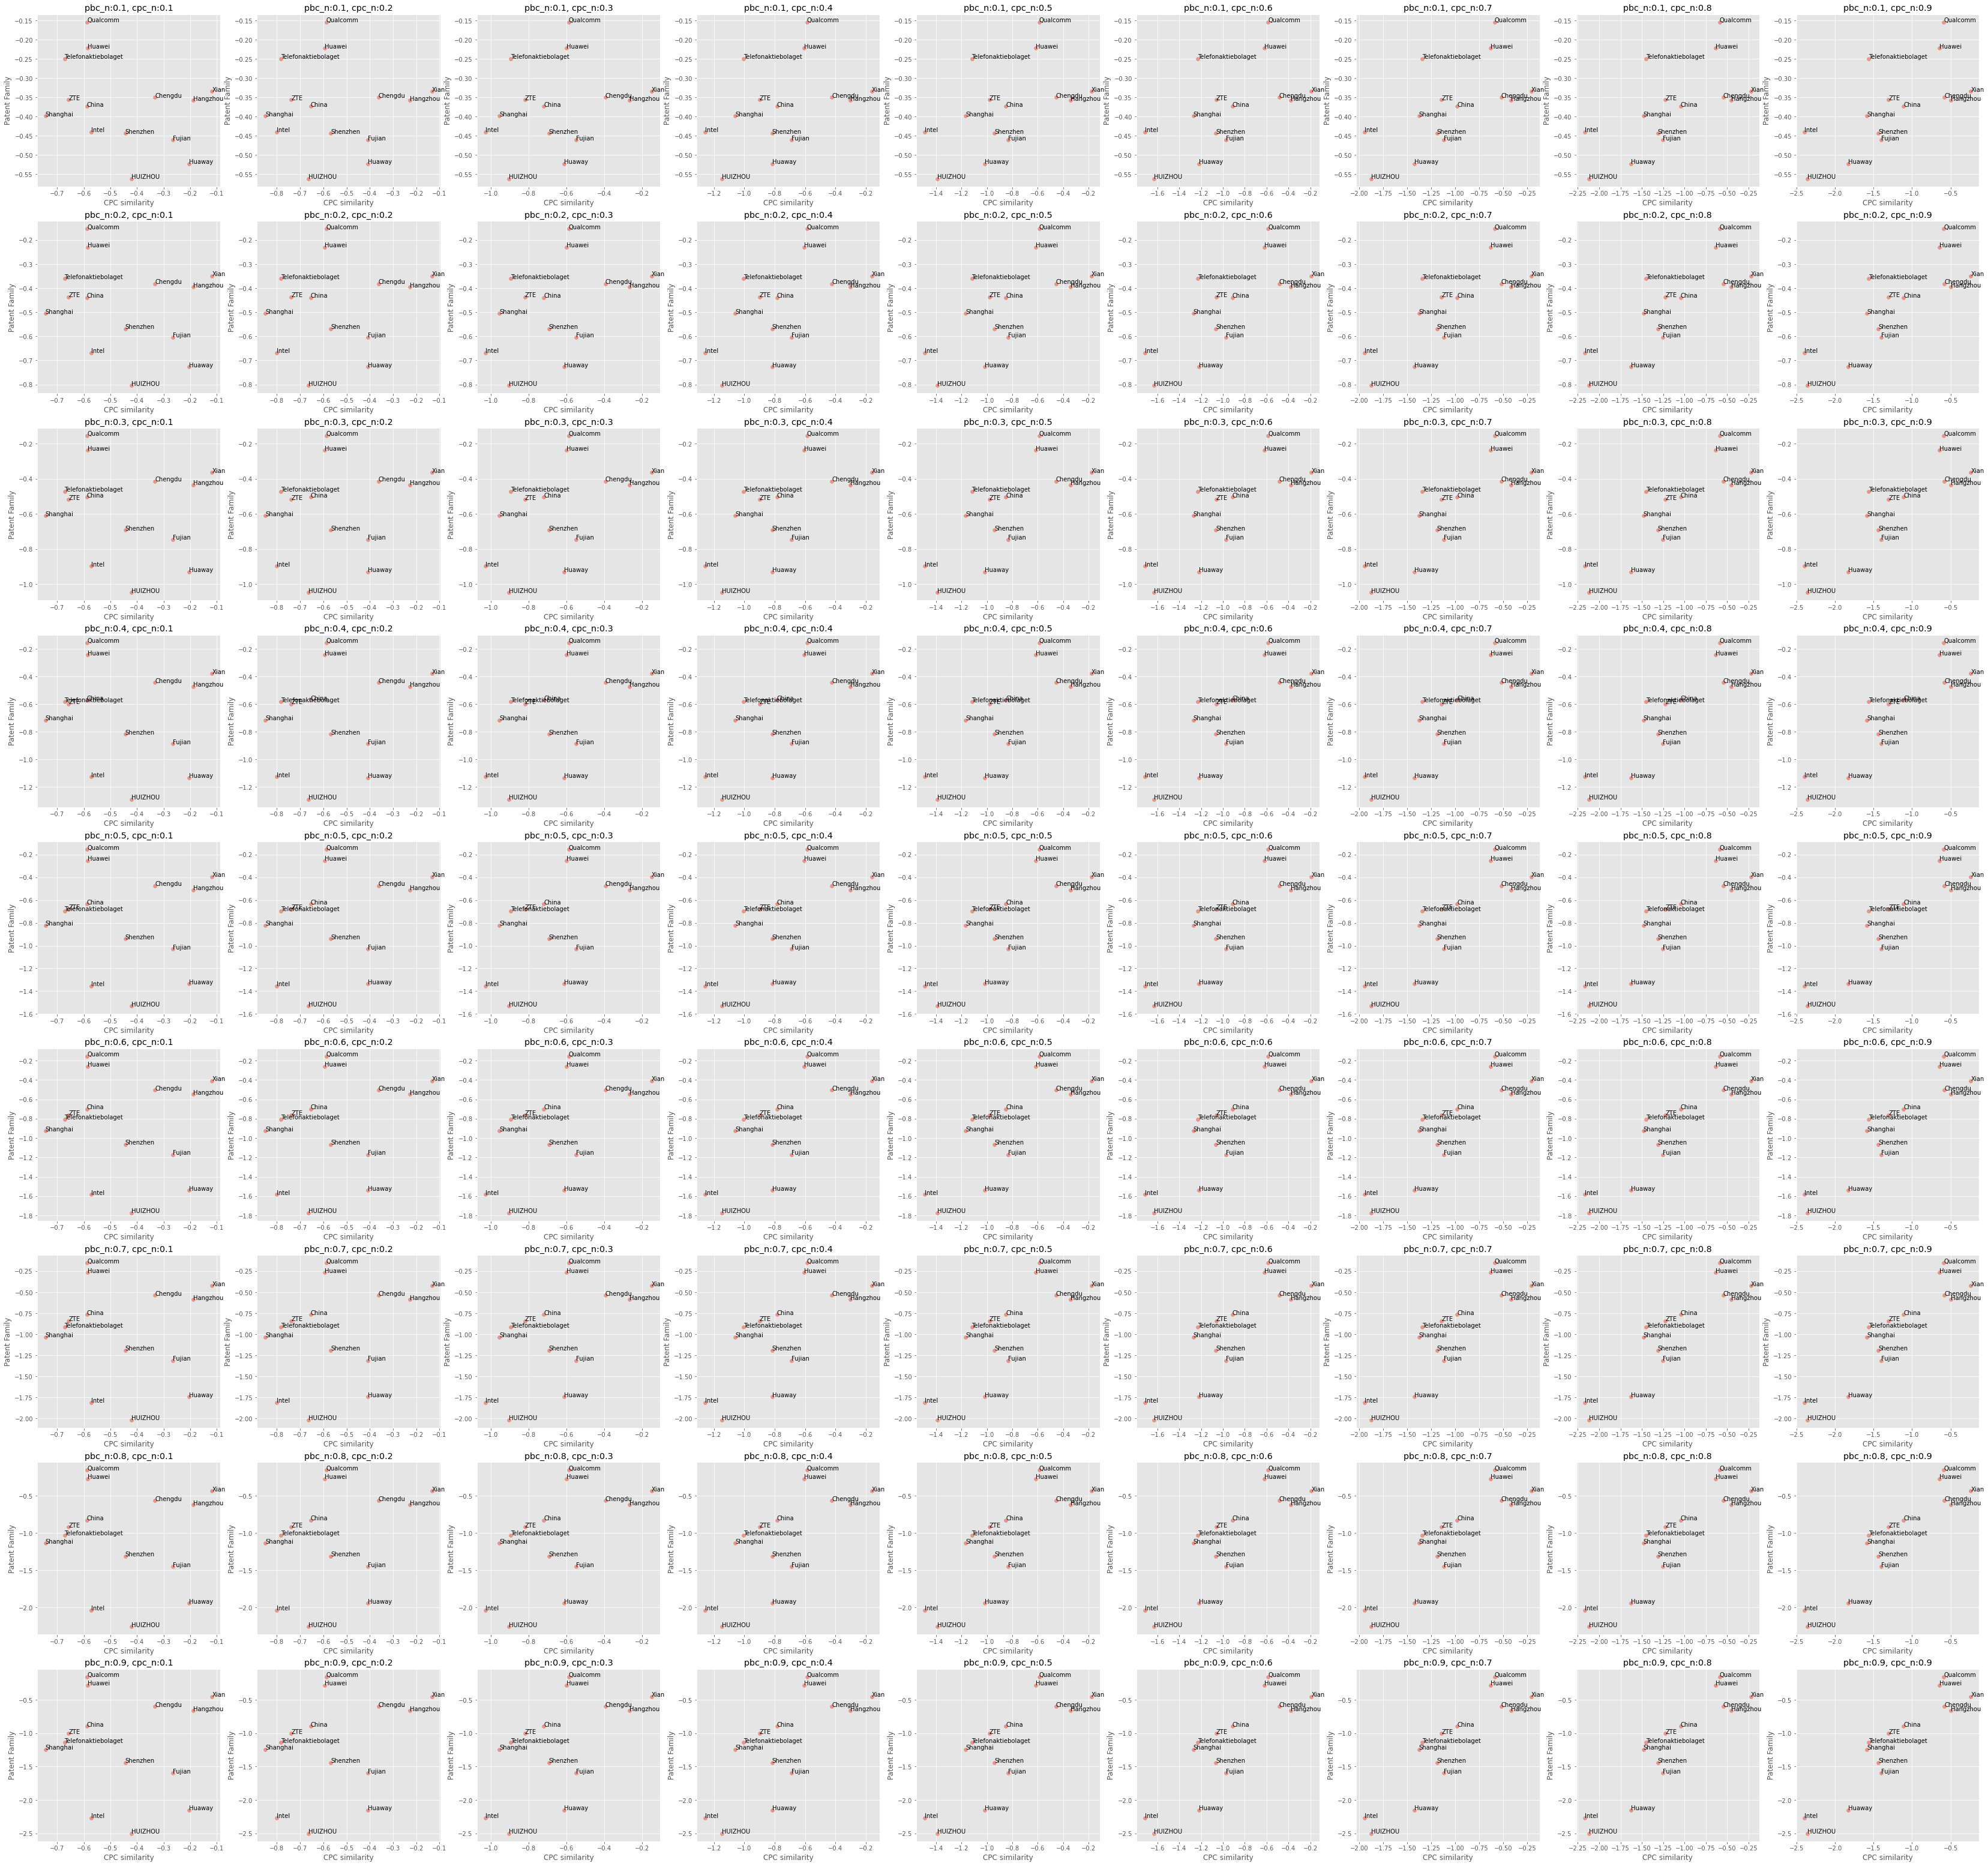

In [32]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_2017_1.png'.format(pbc_n))

In [33]:
c_df

,cpc,country
company,,
Shenzhen Shenglu IoT Communication Technology Co Ltd,1.438458,1.438165
Huawei Technologies Co Ltd,0.645336,0.281276
Qualcomm Inc,0.587736,0.153877
Xian Irain IoT Technology Service Co Ltd,0.235835,0.452090
Chengdu Qinchuan IoT Technology Co Ltd,0.579352,0.597792
Hangzhou Wopu IoT Technology Co Ltd,0.495076,0.662955
China Mobile Communications Group Co Ltd,1.110290,0.894996
ZTE Corp,1.304432,1.003080
Shanghai Langbo Communication Technology Co Ltd,1.588626,1.243591


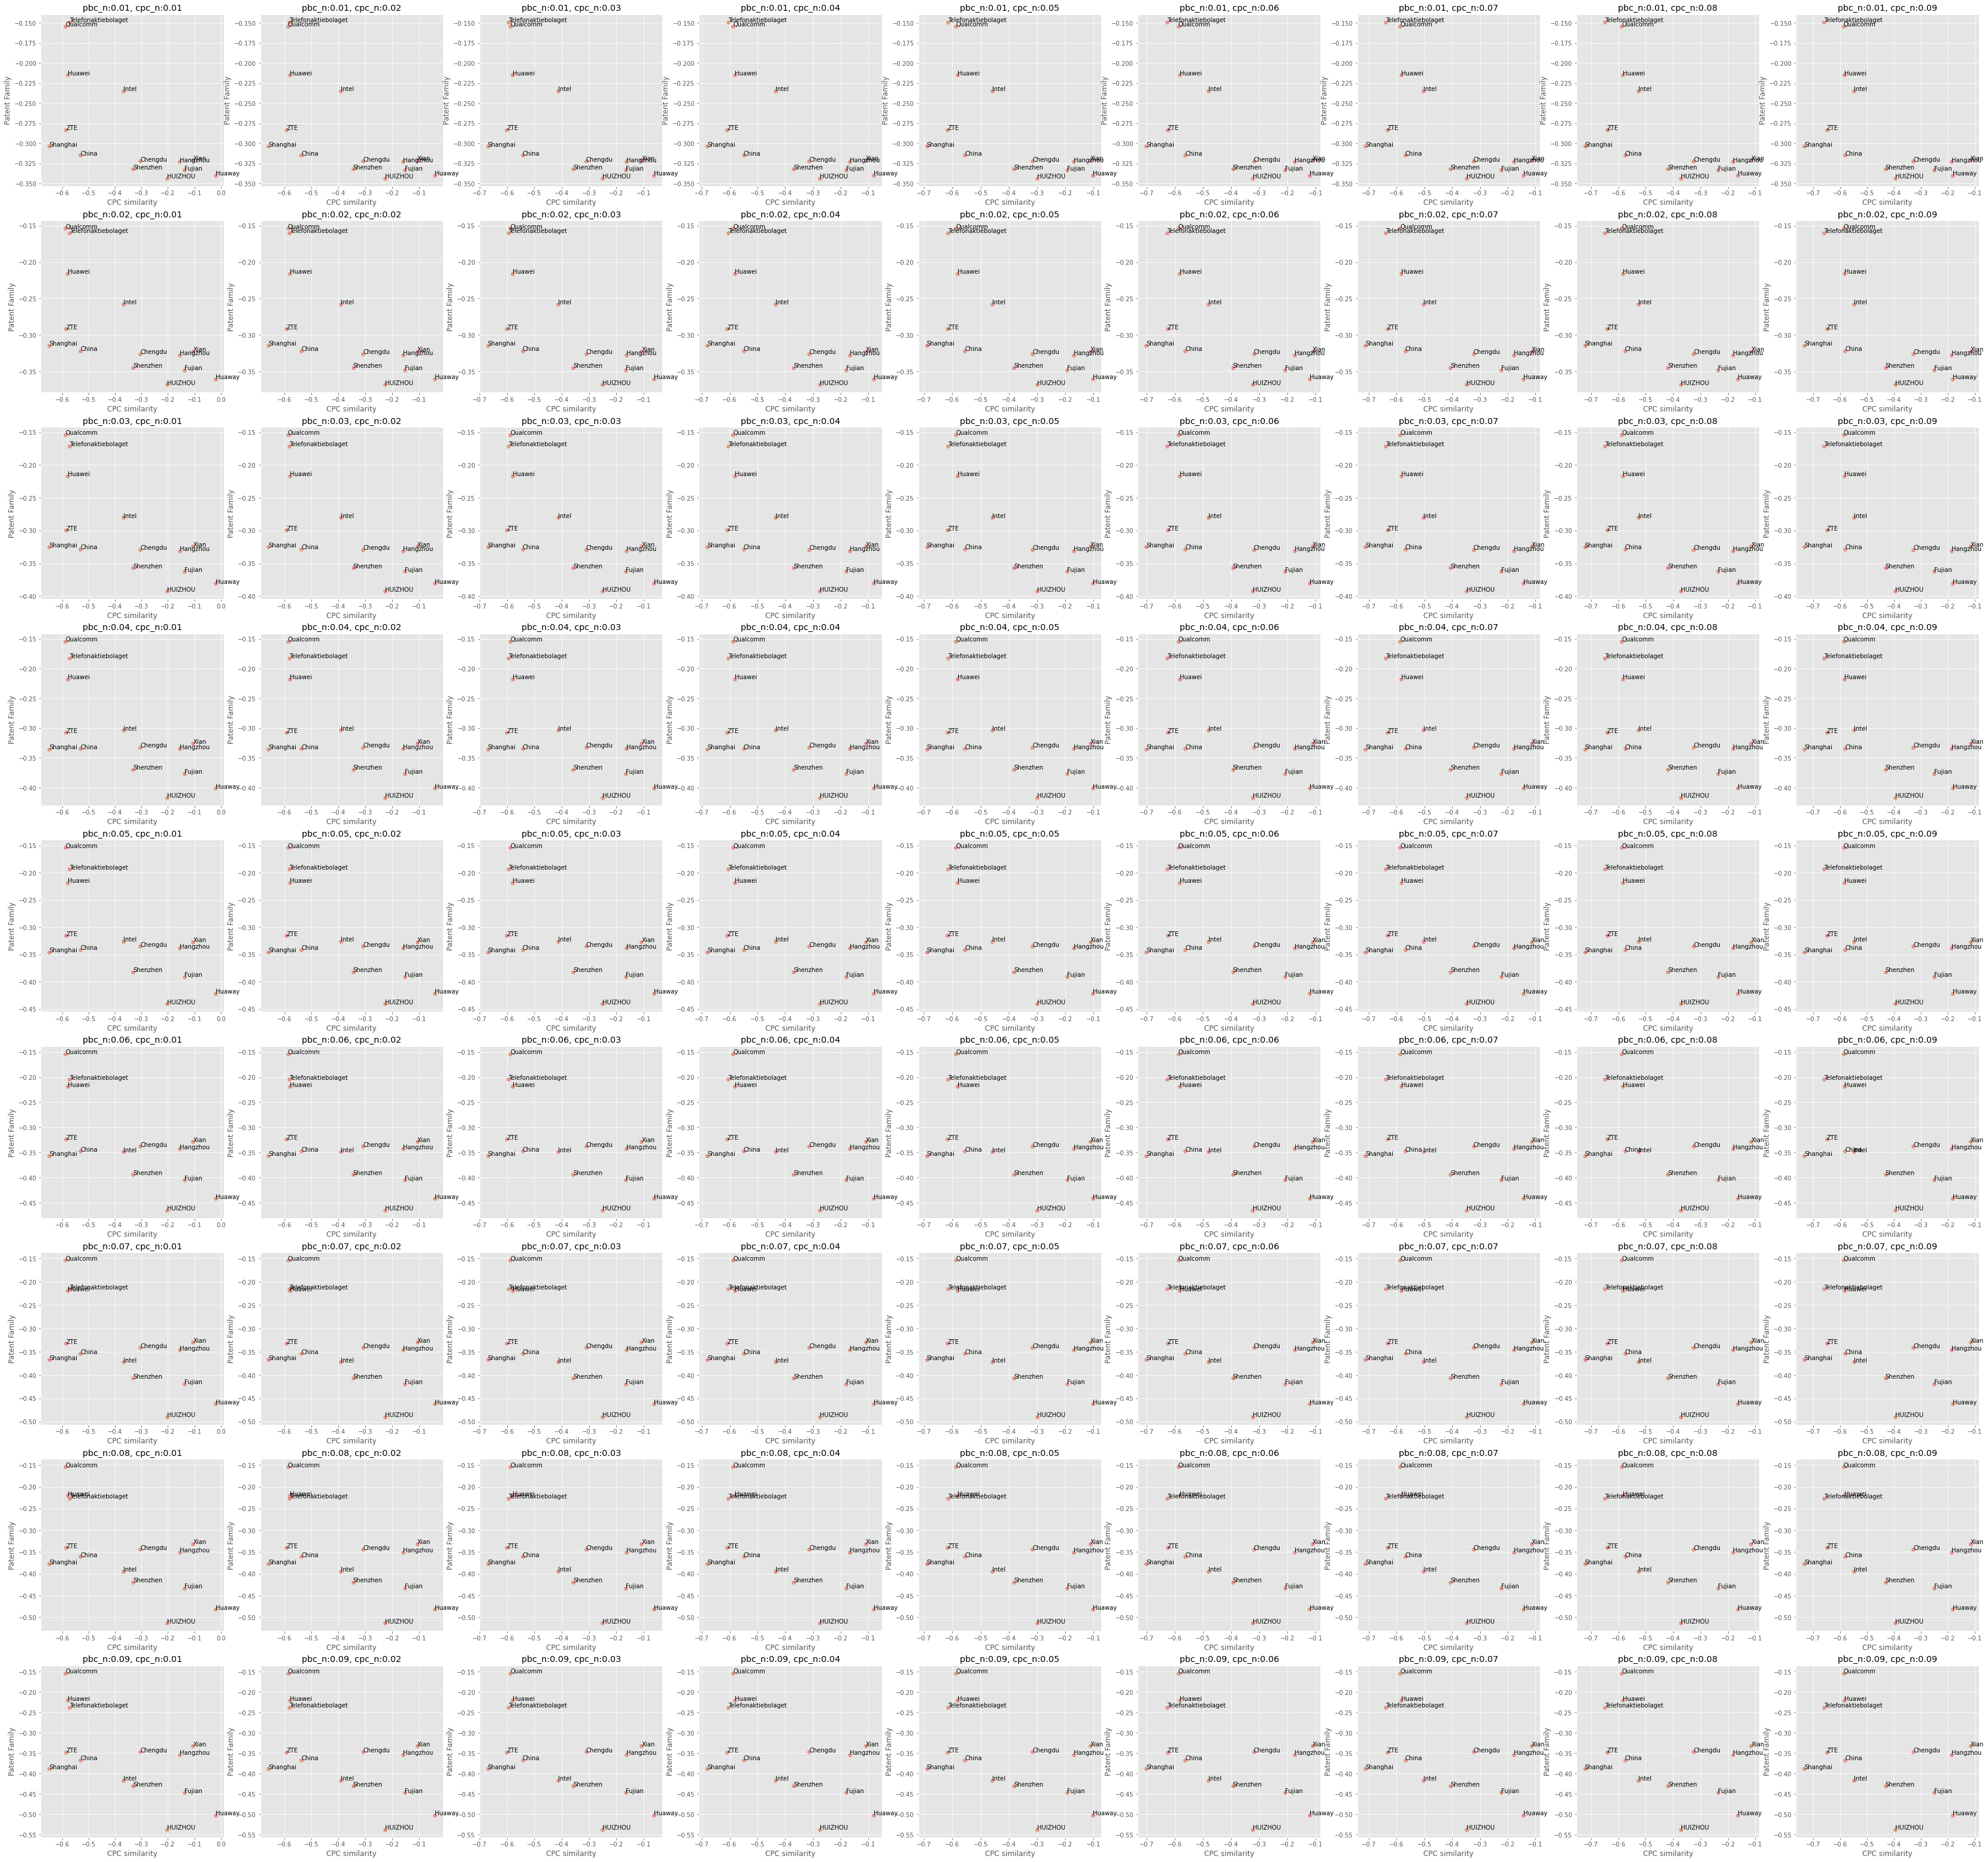

In [34]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_cn_2017_2.png'.format(pbc_n))

In [35]:
c_df

,cpc,country
company,,
Shenzhen Shenglu IoT Communication Technology Co Ltd,0.431771,0.431478
Huawei Technologies Co Ltd,0.585026,0.220966
Qualcomm Inc,0.587717,0.153857
Xian Irain IoT Technology Service Co Ltd,0.116616,0.332871
Chengdu Qinchuan IoT Technology Co Ltd,0.329000,0.347441
Hangzhou Wopu IoT Technology Co Ltd,0.186078,0.353957
China Mobile Communications Group Co Ltd,0.582437,0.367144
ZTE Corp,0.649382,0.348030
Shanghai Langbo Communication Technology Co Ltd,0.733196,0.388161


### Scatter Plot2

In [36]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

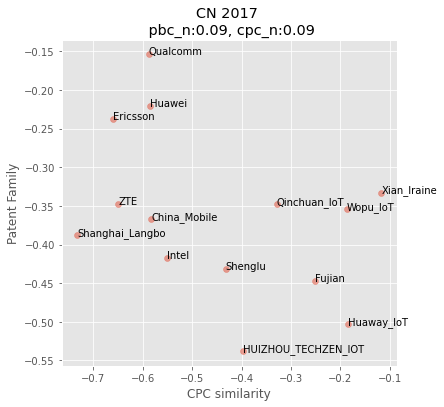

In [37]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("CN 2017 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [38]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [39]:
competitor_ls

[4, 2, 2, 1, 3, 3, 4, 4, 4, 2, 3, 3, 4, 3]

In [40]:
c_df

,cpc,country
company,,
Shenglu,0.431771,0.431478
Huawei Technologies,0.585026,0.220966
Qualcomm,0.587717,0.153857
Xian_Iraine,0.116616,0.332871
Qinchuan_IoT,0.329000,0.347441
Wopu_IoT,0.186078,0.353957
China_Mobile,0.582437,0.367144
ZTE,0.649382,0.348030
Shanghai_Langbo,0.733196,0.388161


In [41]:
c_df.to_csv("competitor_df/company/cpc_cn_2017.csv")

## US

In [42]:
ccontry = pd.read_csv("../rm_company_country_us_2017.csv")
ccpc = pd.read_csv("../rm_company_cpc_us_2017.csv")

In [43]:
ccontry[ccontry.company.isin(com_us_ls)]

,company,AR,AT,AU,BE,BR,CA,CL,CN,CO,...,PL,PT,RS,RU,SE,SG,TR,TW,US,ZA
49,Amazon Technologies Inc,0.0,0.0,2.0,0.0,0.0,2.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,0.0
65,Apple Inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,83.0,0.0
183,Cisco Technology Inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0
433,Intel Corp,0.0,0.0,0.0,0.0,2.0,1.0,0.0,91.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,350.0,0.0
441,International Business Machines Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,1.0
521,LG Electronics Inc,0.0,0.0,0.0,0.0,4.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0
584,Microsoft Technology Licensing LLC,0.0,0.0,1.0,0.0,1.0,1.0,1.0,19.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,108.0,1.0
601,NEC Corp,0.0,0.0,0.0,0.0,1.0,2.0,0.0,18.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,66.0,0.0
605,NTT Docomo Inc,1.0,0.0,3.0,0.0,10.0,6.0,0.0,71.0,0.0,...,1.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,90.0,2.0
647,Nokia Technologies Oy,0.0,0.0,2.0,0.0,0.0,3.0,0.0,52.0,1.0,...,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,73.0,0.0


### Similarity計算

#### Country

- 換成機率  

In [44]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

#### PBC
- 和Samsung Electronics Co Ltd比較

In [45]:
ccontry_pbc = ccontry2.loc[com_us_ls,:].copy()
ccontry_pbc.head()

,AR,AT,AU,BE,BR,CA,CL,CN,CO,DE,...,PL,PT,RS,RU,SE,SG,TR,TW,US,ZA
company,,,,,,,,,,,,,,,,,,,,,
Samsung Electronics Co Ltd,0.000000,0.0,0.006206,0.0,0.000000,0.000000,0.000000,0.128006,0.000000,0.001552,...,0.000000,0.000000,0.0,0.000000,0.0,0.001552,0.0,0.003103,0.366951,0.000000
Qualcomm Inc,0.000663,0.0,0.029158,0.0,0.066269,0.035123,0.000000,0.191518,0.000000,0.000000,...,0.000000,0.000000,0.0,0.001325,0.0,0.018555,0.0,0.068920,0.300199,0.000000
Telefonaktiebolaget LM Ericsson AB,0.017724,0.0,0.013060,0.0,0.019590,0.008396,0.000933,0.147388,0.001866,0.000000,...,0.005597,0.003731,0.0,0.041045,0.0,0.003731,0.0,0.003731,0.305037,0.016791
Intel Corp,0.000000,0.0,0.000000,0.0,0.003460,0.001730,0.000000,0.157439,0.000000,0.083045,...,0.000000,0.000000,0.0,0.003460,0.0,0.000000,0.0,0.010381,0.605536,0.000000
International Business Machines Corp,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.048387,0.000000,0.048387,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.800000,0.003226


In [46]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

#### CPC

In [47]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [48]:
ccpc_pbc = ccpc2.loc[com_us_ls,:].copy()
# ccpc_pbc

In [49]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### Scatter Plot

In [50]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_us_df.count_log[com_us_df.company=="Samsung Electronics Co Ltd"].values-com_us_df.count_log[com_us_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_us_df.count_log[com_us_df.company=="Samsung Electronics Co Ltd"].values-com_us_df.count_log[com_us_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

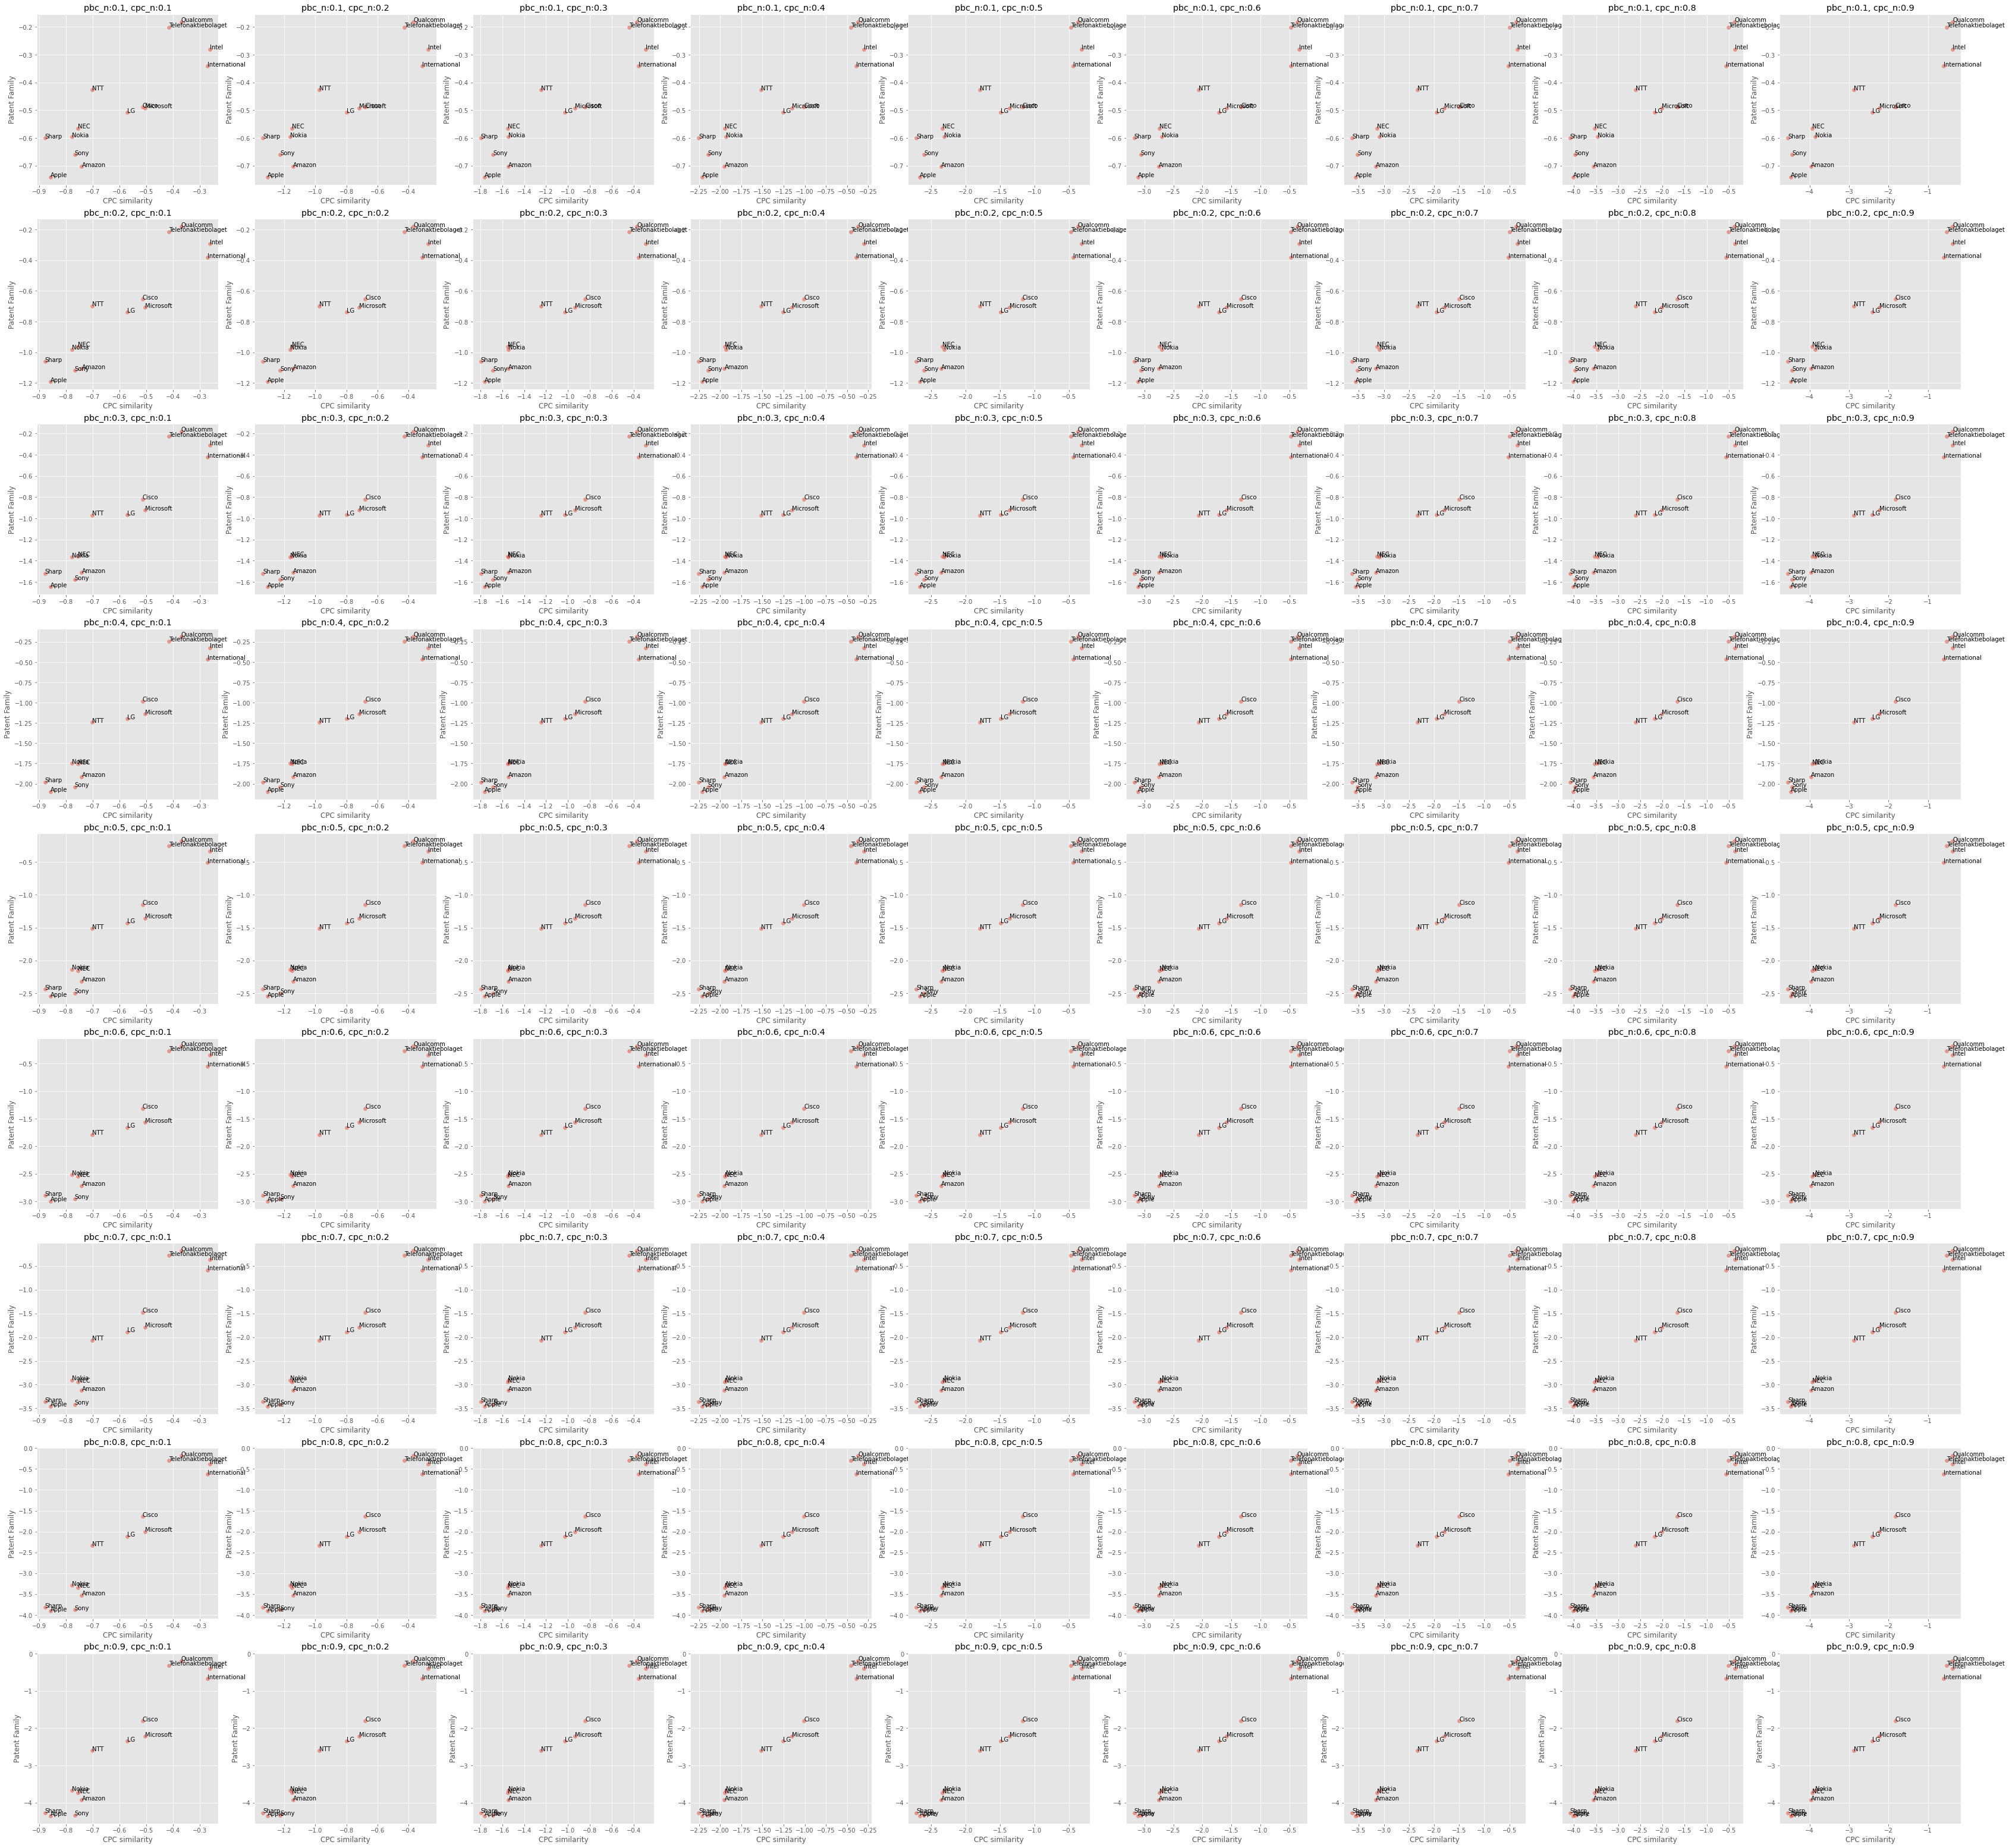

In [51]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_us_2017_1.png'.format(pbc_n))

In [52]:
c_df

,cpc,country
company,,
Qualcomm Inc,0.370419,0.182309
Telefonaktiebolaget LM Ericsson AB,0.524217,0.310013
Intel Corp,0.374292,0.393230
International Business Machines Corp,0.599975,0.670386
Cisco Technology Inc,1.830765,1.805724
Microsoft Technology Licensing LLC,2.228881,2.217352
LG Electronics Inc,2.407748,2.347011
NTT Docomo Inc,2.881650,2.606256
Nokia Technologies Oy,3.853450,3.672624


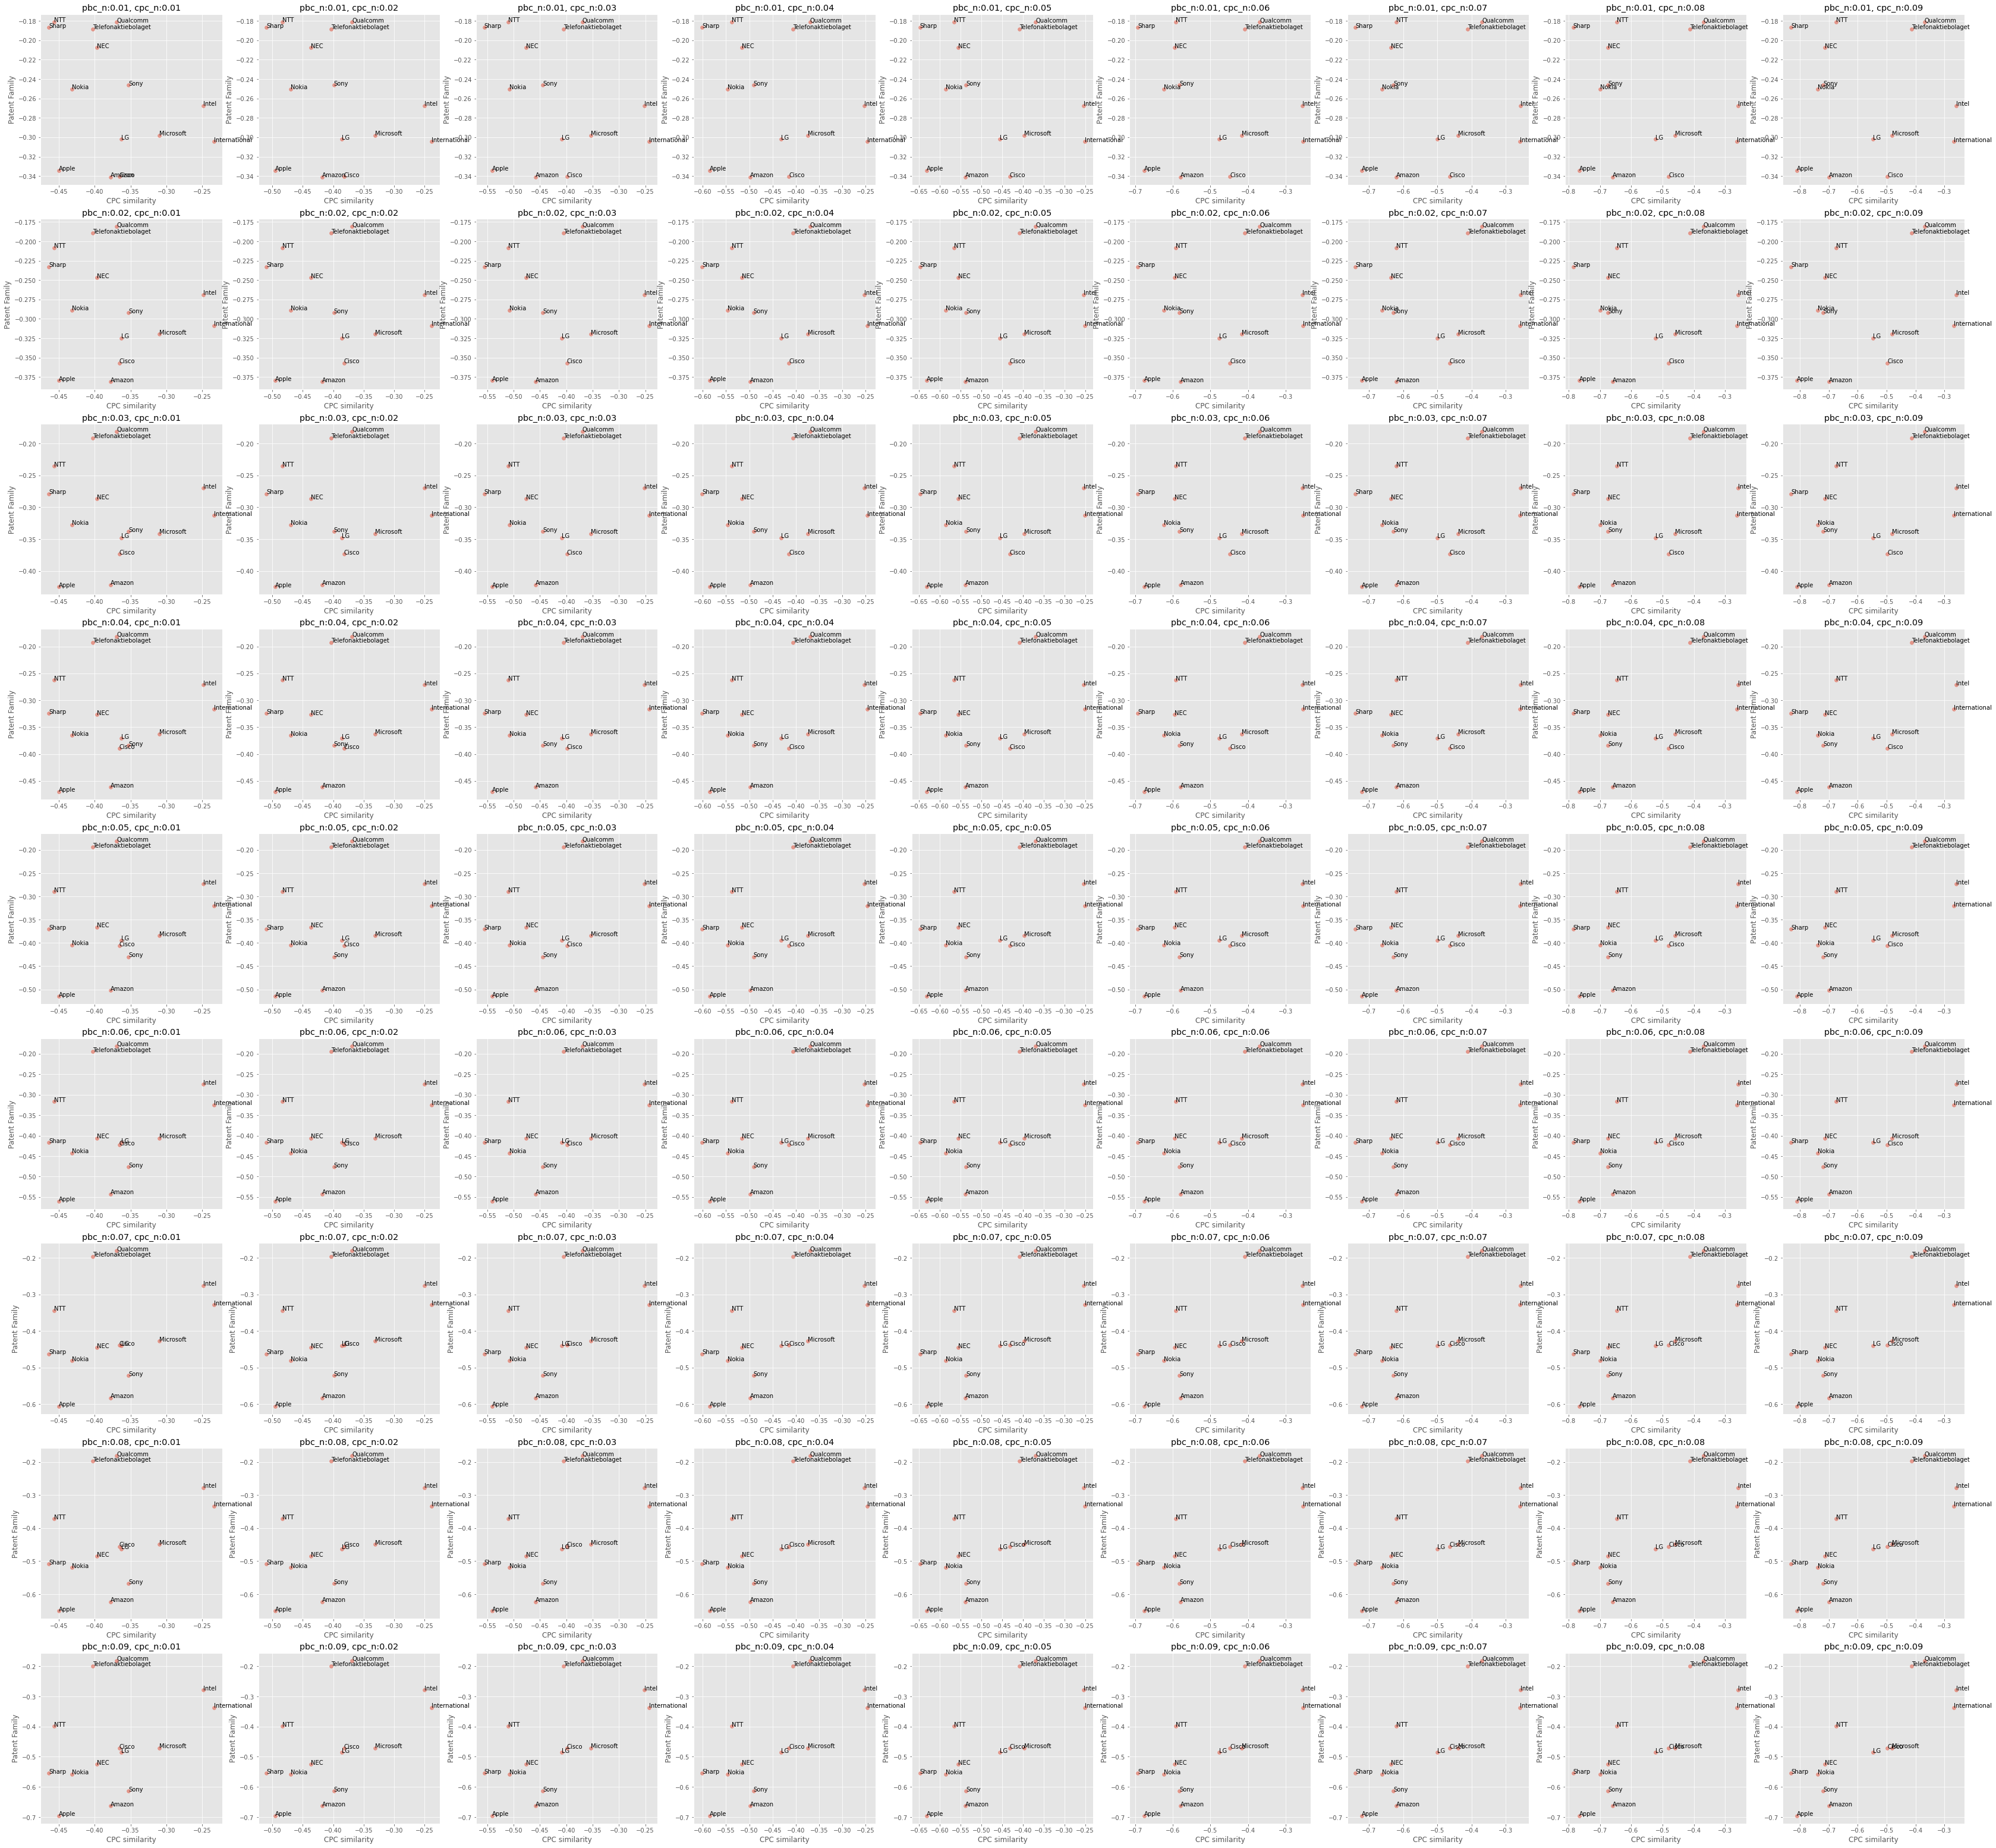

In [53]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_us_2017_2.png'.format(pbc_n))

In [54]:
c_df

,cpc,country
company,,
Qualcomm Inc,0.369315,0.181205
Telefonaktiebolaget LM Ericsson AB,0.413413,0.199208
Intel Corp,0.259746,0.278684
International Business Machines Corp,0.266938,0.337349
Cisco Technology Inc,0.497291,0.472250
Microsoft Technology Licensing LLC,0.482190,0.470661
LG Electronics Inc,0.546471,0.485734
NTT Docomo Inc,0.674304,0.398911
Nokia Technologies Oy,0.738743,0.557917


### Scatter Plot2

In [55]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT")\
                                                    .replace("Anhui Sharetronic Iot Technology","Anhui_Sharetronic")\
                                                    .replace("Nanjing IoT Sensor Technology","Nanjing_IoT")\
                                                    .replace("SUZHOU XUANHE IOT TECHNOLOGY","SUZHOU_XUANHE_IOT")\
                                                    .replace("Jiangsu IoT Research and Development Center","Jiangsu_IoT")\
                                                    .replace("Shenzhen JBT Smart Lighting","JBT_Smart_Lighting")\
                                                    .replace("Shenzhen Mayixiongbing Iot Technology","Mayixiongbing_IoT")\
                                                    .replace("SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCIENCE & TECHNOLOGY","QIANHAI_LINGJU")\
                                                    .replace("Shenzhen Qianhai Livall IoT Technology","Livall")\
                                                    .replace("Nanjing Hansense Iot Technology","Hansense_IOT")\
                                                    .replace("GUANGDONG ABEJ IOT INTELLIGENT TECHNOLOGY","ABEJ_IOT")\
                                                    .replace("Tianjin Hui Zhiwulian Science And Technology","THZST")\
                                                    .replace("Chongqing Liuhe Iot","Chongqing_Liuhe_IOT")\
                                                    .replace("Huizhou Sanhe Iot Technology","Huizhou_Sanhe_IOT")\
                                                    .replace("T Mobile USA","T_Mobile_USA"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

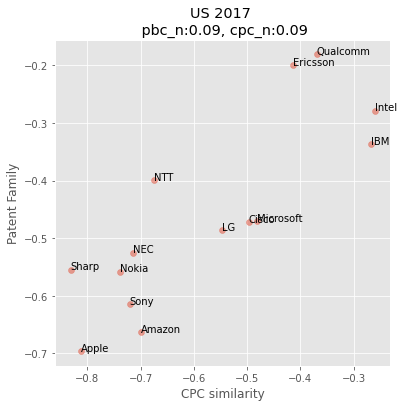

In [56]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("US 2017 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [57]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [58]:
competitor_ls

[1, 1, 1, 1, 3, 3, 4, 2, 4, 4, 4, 4, 4, 4]

In [59]:
c_df

,cpc,country
company,,
Qualcomm,0.369315,0.181205
Ericsson,0.413413,0.199208
Intel,0.259746,0.278684
IBM,0.266938,0.337349
Cisco Systems,0.497291,0.472250
Microsoft,0.482190,0.470661
LG Electronics,0.546471,0.485734
NTT Docomo,0.674304,0.398911
Nokia,0.738743,0.557917


In [60]:
c_df.to_csv("competitor_df/company/cpc_us_2017.csv")

## DE

In [61]:
ccontry = pd.read_csv("../rm_company_country_de_2017.csv")
ccpc = pd.read_csv("../rm_company_cpc_de_2017.csv")

In [62]:
ccontry[ccontry.company.isin(com_de_ls)]

,company,AU,BE,BR,CA,CN,DE,DK,EP,ES,...,JP,KR,MX,NO,PL,PT,RU,SG,TW,US
4,Analog Devices Inc,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Apple Inc,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Fisher Rosemount Systems Inc,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
30,Fraunhofer Gesellschaft zur Forderung der Ange...,0.0,0.0,2.0,3.0,3.0,6.0,0.0,2.0,2.0,...,3.0,3.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0
34,Fujitsu Ltd,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,Giesecke and Devrient Mobile Security GmbH,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Innogy Innovation GmbH,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,Intel Corp,0.0,0.0,0.0,0.0,19.0,49.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,24.0
49,Intel IP Corp,0.0,0.0,0.0,0.0,6.0,50.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0
58,Messer Group GmbH,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Similarity計算

#### Country

- 換成機率  

In [63]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

#### PBC
- 和Samsung Electronics Co Ltd比較

In [64]:
ccontry_pbc = ccontry2.loc[com_de_ls,:].copy()
ccontry_pbc.head()

,AU,BE,BR,CA,CN,DE,DK,EP,ES,FR,...,JP,KR,MX,NO,PL,PT,RU,SG,TW,US
company,,,,,,,,,,,,,,,,,,,,,
Intel Corp,0.0,0.0,0.0,0.0,0.190000,0.490000,0.0,0.010000,0.0,0.0,...,0.010000,0.030000,0.0,0.0,0.0,0.0,0.0,0.020000,0.01,0.240000
Intel IP Corp,0.0,0.0,0.0,0.0,0.088235,0.735294,0.0,0.000000,0.0,0.0,...,0.000000,0.029412,0.0,0.0,0.0,0.0,0.0,0.029412,0.00,0.117647
Apple Inc,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000
Robert Bosch GmbH,0.0,0.0,0.0,0.0,0.000000,0.785714,0.0,0.214286,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000
Sony Corp,0.0,0.0,0.0,0.0,0.117647,0.294118,0.0,0.176471,0.0,0.0,...,0.117647,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.294118


In [65]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

#### CPC

In [66]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [67]:
ccpc_pbc = ccpc2.loc[com_de_ls,:].copy()
# ccpc_pbc

In [68]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### Scatter Plot

In [69]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_de_df.count_log[com_de_df.company=="Samsung Electronics Co Ltd"].values-com_de_df.count_log[com_de_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_de_df.count_log[com_de_df.company=="Samsung Electronics Co Ltd"].values-com_de_df.count_log[com_de_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

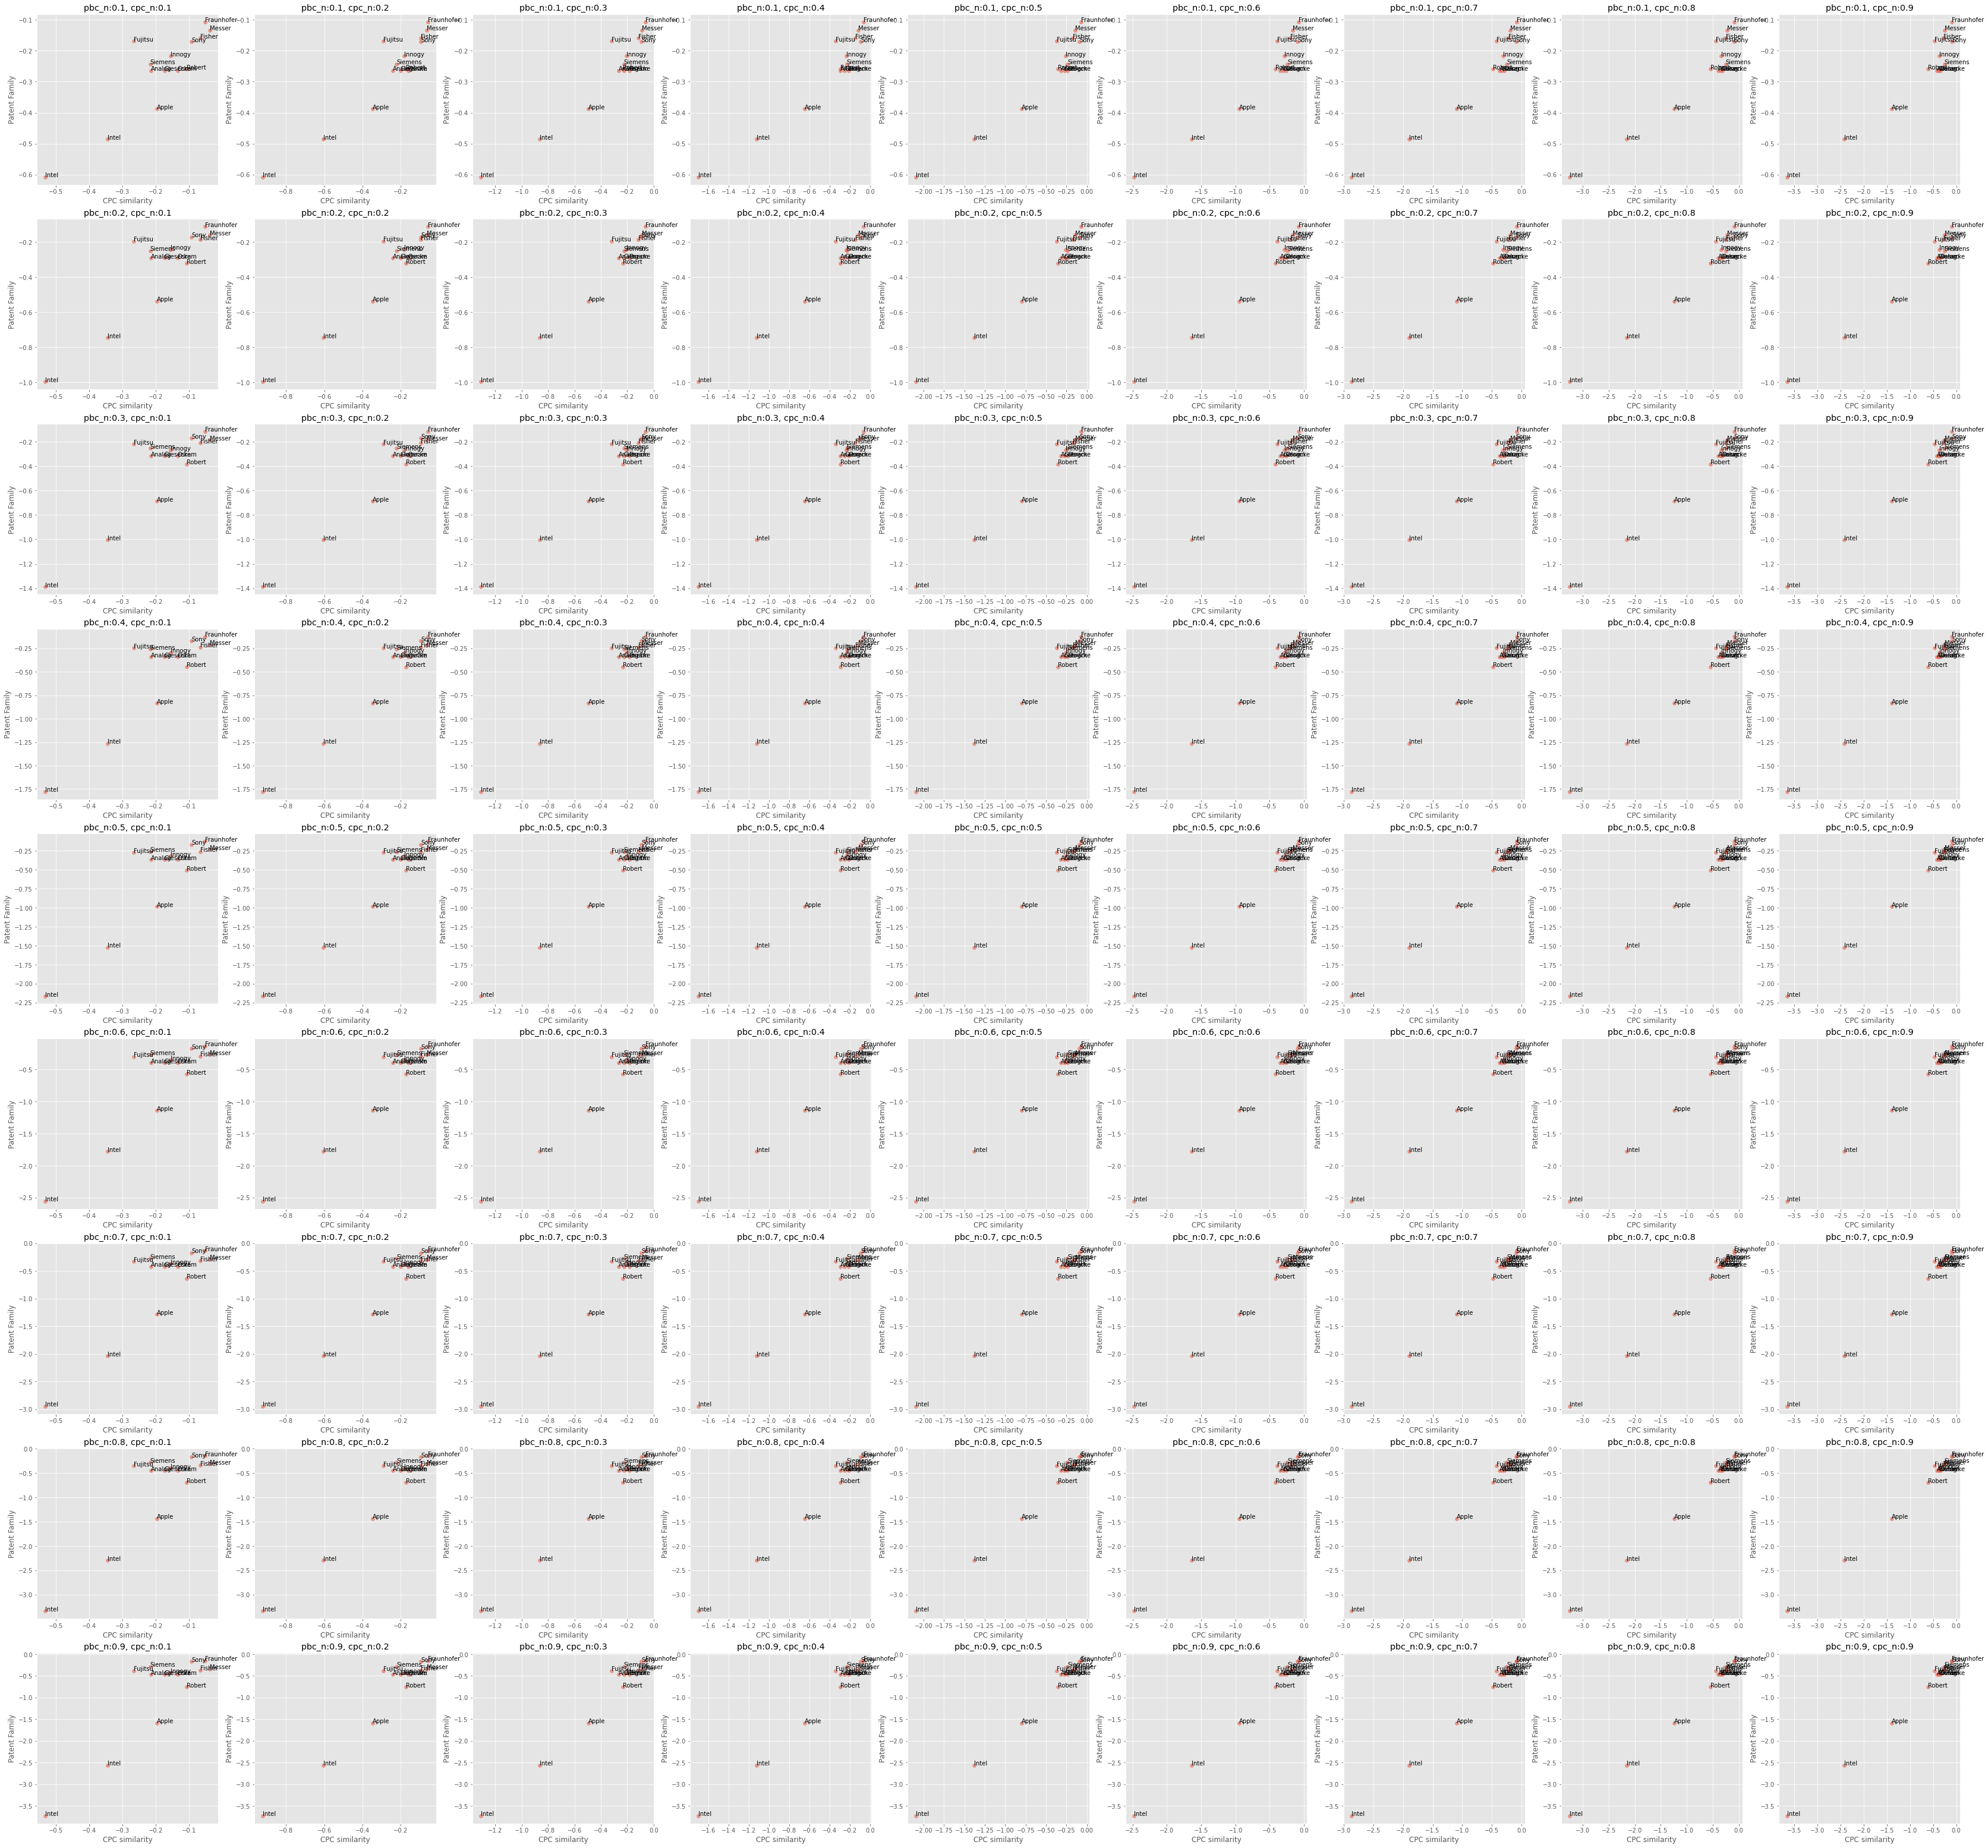

In [70]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_2017_1.png'.format(pbc_n))

In [71]:
c_df

,cpc,country
company,,
Intel Corp,3.649891,3.725392
Intel IP Corp,2.417342,2.558152
Apple Inc,1.395058,1.585959
Robert Bosch GmbH,0.605230,0.756777
Sony Corp,0.092676,0.170868
Siemens AG,0.256352,0.282909
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.091787,0.146487
Innogy Innovation GmbH,0.364389,0.425325
Osram GmbH,0.343022,0.472944


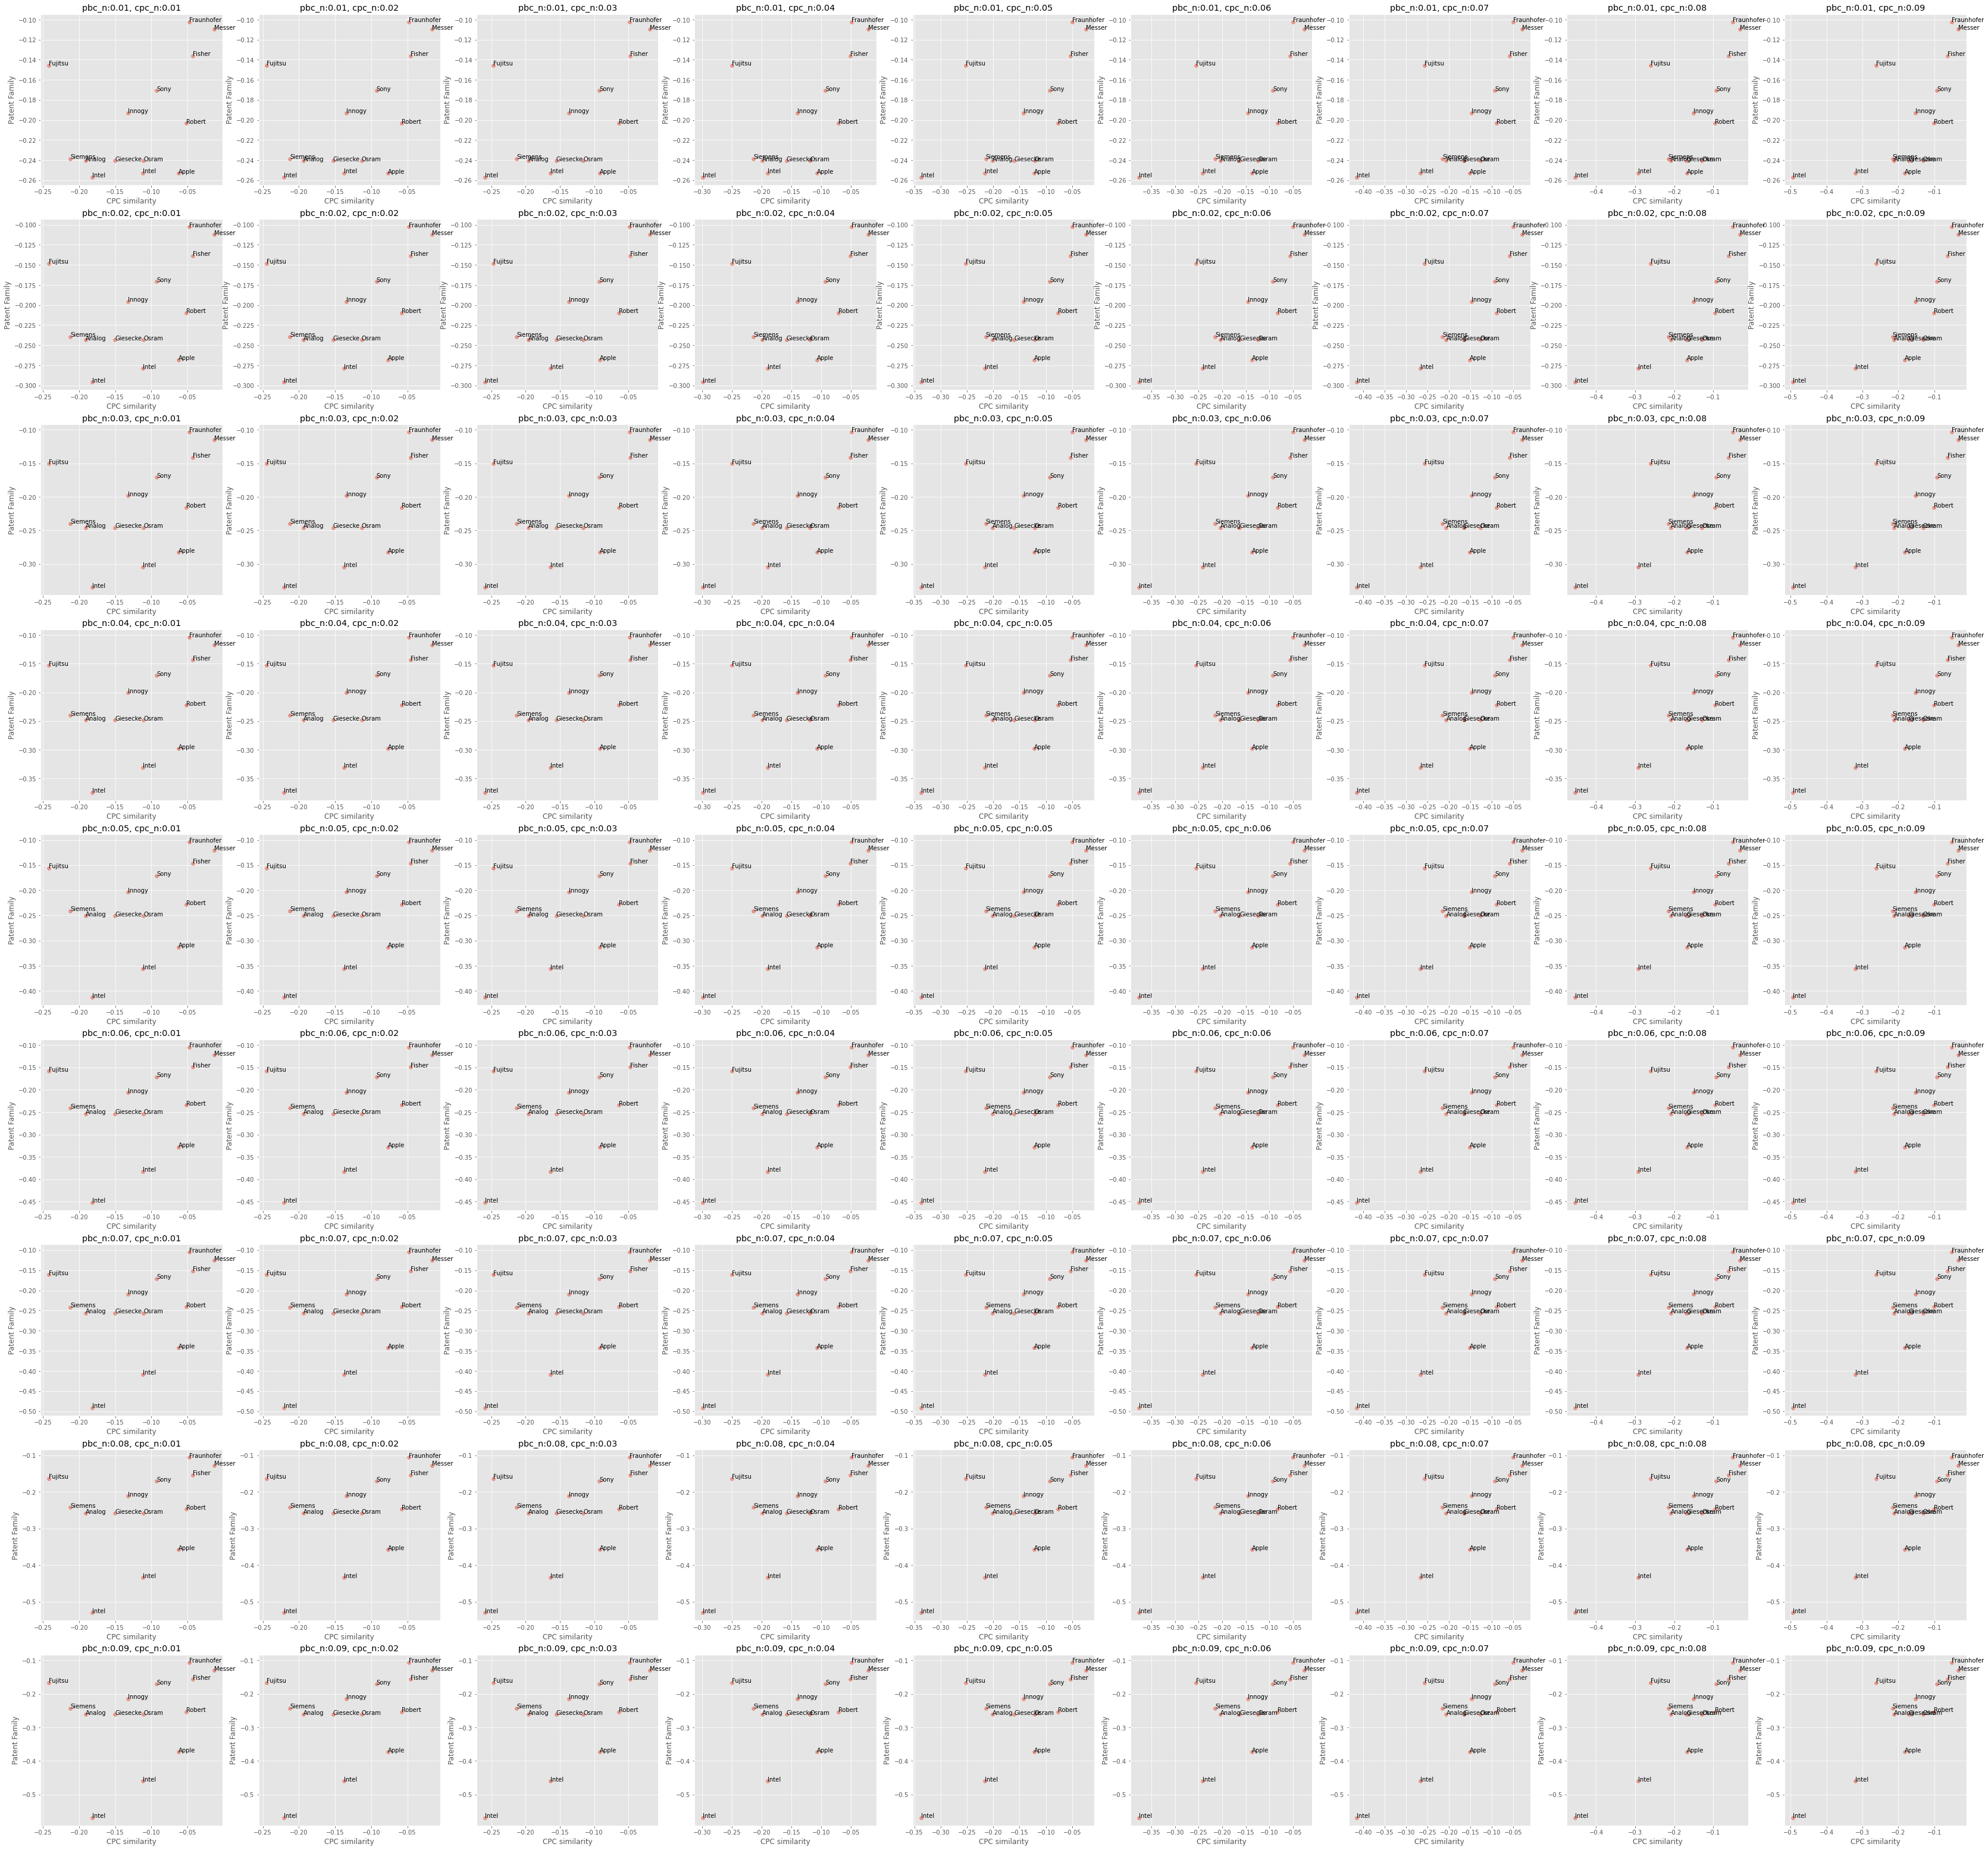

In [72]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC similarity")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_de_2017_2.png'.format(pbc_n))

In [73]:
c_df

,cpc,country
company,,
Intel Corp,0.493325,0.568825
Intel IP Corp,0.319207,0.460017
Apple Inc,0.181981,0.372882
Robert Bosch GmbH,0.101682,0.253229
Sony Corp,0.092676,0.170868
Siemens AG,0.216020,0.242577
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.051455,0.106154
Innogy Innovation GmbH,0.153025,0.213961
Osram GmbH,0.131658,0.261580


### Scatter Plot2

In [74]:
c_df = scatter_plot(pbc_n,cpc_n)
c_df = c_df.reset_index()
c_df["company"] = c_df.company.apply(lambda x: x.replace(" Inc","")\
                                                    .replace(" Co Ltd","")\
                                                    .replace(" Co. Ltd.","")\
                                                    .replace(" Co., Ltd.","")\
                                                    .replace(" Ltd","")\
                                                    .replace(" Corp","")\
                                                    .replace("..","")\
                                                    .replace("International Business Machines","IBM")\
                                                    .replace("Nippon Telegraph and Telephone","Nippon Telegraph & Tel")\
                                                    .replace("Alibaba Group Holding Ltd","Alibaba")\
                                                    .replace("ZTE Intelligent IoT Technology","ZTE")\
                                                    .replace("AT&T Intellectual Property I LP","AT&T")\
                                                    .replace("Microsoft Technology Licensing LLC","Microsoft")\
                                                    .replace("Telefonaktiebolaget LM Ericsson AB","Ericsson")\
                                                    .replace("Cisco Technology","Cisco Systems")\
                                                    .replace("Verizon Patent and Licensing","Verizon Communications")\
                                                    .replace("Nokia Technologies Oy","Nokia")\
                                                    .replace("China Mobile Communications Group","China Mobile")\
                                                    .replace("Nokia Solutions and Networks Oy","Nokia")\
                                                    .replace("China Mobile","China_Mobile")\
                                                    .replace("China Mobile IoT","China_Mobile_IoT")\
                                                    .replace("China United Network Communications Group","China_Unicom")\
                                                    .replace("Shanghai Langbo Communication Technology","Shanghai_Langbo")\
                                                    .replace("State Grid of China SGCC","SGCC")\
                                                    .replace("Beijing Sankuai Online Technology","Beijing_Sankuai")\
                                                    .replace("Beijing Xiaomi Mobile Software","Xiaomi")\
                                                    .replace("Guangdong Oppo Mobile Telecommunications","Oppo")\
                                                    .replace("Shanghai Roye Electric Science and Technology","Shanghai_Roye_Electric")\
                                                    .replace("Xian Irain IoT Technology Servic","Xian_Irain")\
                                                    .replace("China University of Geosciences","CUG")\
                                                    .replace("Shenzhen Shenglu IoT Communication Technology","Shenglu")\
                                                    .replace("Chengdu Qinchuan IoT Technology","Qinchuan_IoT")\
                                                    .replace("Hangzhou Wopu IoT Technology","Wopu_IoT")\
                                                    .replace("Huaway IoT Technology","Huaway_IoT")\
                                                    .replace("HUIZHOU TECHZEN IOT SCIENCE & TECHNOLOGY","HUIZHOU_TECHZEN_IOT")\
                                                    .replace("Anhui Sharetronic Iot Technology","Anhui_Sharetronic")\
                                                    .replace("Nanjing IoT Sensor Technology","Nanjing_IoT")\
                                                    .replace("SUZHOU XUANHE IOT TECHNOLOGY","SUZHOU_XUANHE_IOT")\
                                                    .replace("Jiangsu IoT Research and Development Center","Jiangsu_IoT")\
                                                    .replace("Shenzhen JBT Smart Lighting","JBT_Smart_Lighting")\
                                                    .replace("Shenzhen Mayixiongbing Iot Technology","Mayixiongbing_IoT")\
                                                    .replace("SHENZHEN QIANHAI LINGJU INTERNET OF THINGS SCIENCE & TECHNOLOGY","QIANHAI_LINGJU")\
                                                    .replace("Shenzhen Qianhai Livall IoT Technology","Livall")\
                                                    .replace("Nanjing Hansense Iot Technology","Hansense_IOT")\
                                                    .replace("GUANGDONG ABEJ IOT INTELLIGENT TECHNOLOGY","ABEJ_IOT")\
                                                    .replace("Tianjin Hui Zhiwulian Science And Technology","THZST")\
                                                    .replace("Chongqing Liuhe Iot","Chongqing_Liuhe_IOT")\
                                                    .replace("Huizhou Sanhe Iot Technology","Huizhou_Sanhe_IOT")\
                                                    .replace("T Mobile USA","T_Mobile_deA")\
                                                    .replace("Taiwan Semiconductor Manufacturing Co TSMC","TSMC")\
                                                    .replace("Suzhou Jiang Zuomen Network Technology","Suzhou_JZ")\
                                                    .replace("Suzhou Jiang Zuomen Network Tech","Suzhou_JZ_net")\
                                                    .replace("Sony Group","Sony_Group")\
                                                    .replace("Sony Semiconductor Solutions","Sony_Semiconductor")\
                                                    .replace("Siemens Energy Global GmbH and Co KG","Siemens_Energy")\
                                                    .replace("Siemens Mobility GmbH","Siemens_Mobility")\
                                                    .replace("Bayerische Motoren Werke AG","BMW")\
                                                    .replace("Friedrich Alexander Univeritaet Erlangen Nuernberg FAU","FAU")\
                                                    .replace("Intel IP","Intel_IP"))
c_df.set_index("company", inplace=True)
c_df = c_df.drop("Samsung Electronics")

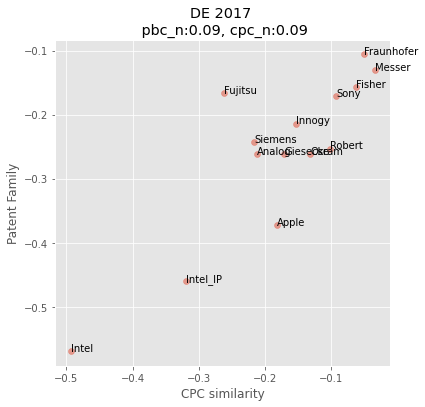

In [75]:
pbc_n=0.09
cpc_n=0.09
# c_df = scatter_plot(pbc_n,cpc_n)
# c_df = c_df.drop("Samsung Electronics Co Ltd")

plt.figure(figsize=(6,6))
plt.style.use('ggplot')
#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("DE 2017 \n pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [76]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [77]:
competitor_ls

[4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [78]:
c_df

,cpc,country
company,,
Intel,0.493325,0.568825
Intel_IP,0.319207,0.460017
Apple,0.181981,0.372882
Robert Bosch GmbH,0.101682,0.253229
Sony,0.092676,0.170868
Siemens AG,0.216020,0.242577
Fraunhofer Gesellschaft zur Forderung der Angewandten Forschung eV,0.051455,0.106154
Innogy Innovation GmbH,0.153025,0.213961
Osram GmbH,0.131658,0.261580


In [79]:
c_df.to_csv("competitor_df/company/cpc_de_2017.csv")